Research Question: How has an increase in pollution levels over the last couple decades affected public sentiment towards environmental activism and sustainable practices? 
What is the correlation between climate change throughout the years and sentiment towards environmental activism/sustainable practices, for example a plant-based diet?

Data Cleaning: For the environmental pollution (greenhouse gas emissions) dataset (the first dataset loaded into this jupyter notebook) the first step was to drop columns 1-3 of the dataset because column 1 contained the indices and not values and columns 2-3 only contained NaN values since they were empty. After removing the columns, we relabeled the row indices to start from 0 again and changed the column names from unnamed to the names given from column 1 (which we previously removed). We then sorted the values of the state column. Finally, we removed all commas from each of the values in the data set and converted them to floats so that we could find the mean for each state from the years 2011-2018. We repeated the same steps to sort the data set by industry sector as well. 

For the school survey data set (the second dataset loaded into this jupyter notebook), we first dropped the first column since it contained the names for the column indices and renamed the columns. 


Data Description: For the dataset on greenhouse gas emissions, each observation is of a facility that emits greenhouse gases. The majority of the facilities include power plants and chemical production centers. The attributes for each of these observations include FRS ID, facility name, city, state, zip code, address, county, latitude, longitude, NAICS code, industry subparts, industry sector, and emission for the years 2011 through 2018.  This dataset was created by the Environmental Protection Agency (EPA) in order to monitor greenhouse gas emissions for specific facilities across industries over time. Since the EPA sets environmental regulations, this data was likely collected in order to better understand how much pollution certain facilities contribute to the environment in order to determine a plan for regulating these industries. Given this, each facility likely provides the EPA with this data and is aware of the data collection that is occurring. The raw data can be found on our github page under the csv file that is named ghgp_data_by_year.

Data Limitations: For our research question, we are interested in the relationship between climate change throughout the years and sentiment towards environmental activism/sustainable practices in the general public. This dataset, however, shows pollution levels by specific facilities and industries and not the general public. Because the dataset doesn’t reflect the entire population of who we’re trying to analyze, the trends we find might not be generalizable to the entire public and it might be difficult to bring the dataset of greenhouse gas emissions and the school survey together. Since this data was collected by the EPA likely to regulate emissions, the emissions over time for each observation might be affected by certain EPA regulations. 

Questions: 
Do you have any advice for what kind of further analysis we could do with the dataset on greenhouse gas emissions?
How do you think we can connect both of the datasets to see trends in behavior versus pollution levels?


Exploratory data analysis:

In [28]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [29]:
## load data on ghg data
ghg_data = pd.read_csv("ghgp_data_by_year.csv")
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,This data was reported to EPA by facilities as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All emissions data is presented in units of me...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Latest Reported Industry Type (subparts),Latest Reported Industry Type (sectors),2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"


In [30]:
## Get rid of first two rows because they are just an explanation
ghg_data = ghg_data.dropna()
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Latest Reported Industry Type (subparts),Latest Reported Industry Type (sectors),2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
5,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
6,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"


In [31]:
#remove first row that had desired column names in undesired location
ghg_data = ghg_data.drop([2],axis=0)
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
5,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
6,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
7,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [32]:
## Reset index
ghg_data = ghg_data.reset_index(drop=True)
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
1,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
2,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
3,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
4,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [33]:
## Rename the columns
ghg_data.rename(columns={'Summary data collected by the Greenhouse Gas Reporting Program':'facility_id',
                          'Unnamed: 1':'frs_id',
                          'Unnamed: 2':'facility_name',
                            'Unnamed: 3': 'city',
                            'Unnamed: 4':'state',
                            'Unnamed: 5': 'zip_code',
                            'Unnamed: 6': 'address',
                            'Unnamed: 7':'county',
                            'Unnamed: 8': 'latitude',
                            'Unnamed: 9': 'longitude',
                            'Unnamed: 10':'naics_code',
                            'Unnamed: 11':'industy_subparts',
                            'Unnamed: 12':'industry_sector',
                            'Unnamed: 13':'2018',
                            'Unnamed: 14':'2017',
                            'Unnamed: 15':'2016',
                            'Unnamed: 16':'2015',
                            'Unnamed: 17':'2014',
                            'Unnamed: 18':'2013',
                            'Unnamed: 19':'2012',
                            'Unnamed: 20':'2011'},
                 inplace=True)
ghg_data.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
1,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
2,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
3,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
4,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [7]:
## Sort the data by state
ghg_state = ghg_data.sort_values(by = ['state'])
ghg_state.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
2916,1004719,110041255012,CHENA POWER PLANT,FAIRBANKS,AK,99701,1206 1ST AVE,FAIRBANKS NORTH STAR BOROUGH,64.85,-147.73,...,C,Power Plants,"321,500.94","314,164.74","334,019.09","331,719.04","328,081.70","321,806.70","328,261.76","350,029.07"
3097,1005004,110007919501,Tesoro Alaska Company LLC - KLNG,Kenai,AK,99611,48237 Kenai Spur Highway,KENAI PENINSULA BOROUGH,60.68,-151.39,...,"C,W-LNGIE",Petroleum and Natural Gas Systems,"4,484.28","16,845.34","12,243.00","186,840.27","175,911.99","53,833.30","229,404.07","294,567.91"
3270,1005349,110044228289,CENTRAL PENINSULA BALING FACILITY-SOLDOTNA LF,SOLDOTNA,AK,99669,98.5 STERLING HWY.,KENAI PENINSULA BOROUGH,60.44,-151.11,...,"C,HH",Waste,"53,028.59","52,632.45","50,910.30","55,202.80","55,063.94","52,830.50","51,725.00","51,369.30"
2245,1003492,110021331664,HANK NIKKELS PLANT ONE,ANCHORAGE,AK,99501,821 EAST FIRST AVENUE,ANCHORAGE MUNICIPALITY,61.22,-149.87,...,C,Power Plants,"21,076.32","34,704.32","28,806.64","30,495.84","22,905.82","19,097.93","36,153.42","58,152.23"
4770,1007874,110064626846,NIKISKI CO-GENERATION,NIKISKI,AK,99635,48169 KENAI SPUR HIGHWAY,KENAI PENINSULA BOROUGH,60.68,-151.38,...,C,Power Plants,"192,573.12","218,051.03","189,446.24","198,337.00","171,829.05","143,244.66","163,901.88","190,496.73"


In [8]:
## Find the number of unique states
state_unique_values = ghg_data["state"].unique()
state_unique_values

array(['WA', 'IN', 'NC', 'IL', 'CA', 'MA', 'NM', 'FL', 'MO', 'NE', 'PA',
       'LA', 'TX', 'OK', 'AZ', 'OH', 'IA', 'WI', 'ME', 'SD', 'WY', 'CO',
       'NV', 'CT', 'NY', 'GA', 'TN', 'DE', 'NJ', 'UT', 'MN', 'ID', 'MS',
       'MT', 'AL', 'SC', 'NH', 'MI', 'VA', 'AR', 'KS', 'RI', 'HI', 'ND',
       'WV', 'KY', 'MD', 'OR', 'AK', 'DC', 'VT', 'PR', 'VI', 'GU'],
      dtype=object)

In [9]:
## Subset the state data to only contain the state and years
ghg_state_mean = ghg_state[["state", "2018","2017","2016","2015","2014","2013","2012","2011"]]
ghg_state_mean.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,"321,500.94","314,164.74","334,019.09","331,719.04","328,081.70","321,806.70","328,261.76","350,029.07"
3097,AK,"4,484.28","16,845.34","12,243.00","186,840.27","175,911.99","53,833.30","229,404.07","294,567.91"
3270,AK,"53,028.59","52,632.45","50,910.30","55,202.80","55,063.94","52,830.50","51,725.00","51,369.30"
2245,AK,"21,076.32","34,704.32","28,806.64","30,495.84","22,905.82","19,097.93","36,153.42","58,152.23"
4770,AK,"192,573.12","218,051.03","189,446.24","198,337.00","171,829.05","143,244.66","163,901.88","190,496.73"


In [10]:
## Find the range of the ghg_state dataset
ghg_state_mean.describe()

,state,2018,2017,2016,2015,2014,2013,2012,2011
count,5183,5183,5183,5183,5183,5183,5183,5183,5183
unique,54,5168,5168,5172,5175,5176,5172,5173,5171
top,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,514,15,15,7,6,8,10,9,11


In [11]:
# Create variable for the number of rows in the dataset
num_rows = len(ghg_state_mean)
print(num_rows)

5183


In [12]:
## Remove the commas from the strings of numbers in order to convert strings to floats
ghg_state_mean_copy = ghg_state_mean.copy()
for col in ghg_state_mean_copy:
    for row in range(num_rows):
        ghg_state_mean_copy[col].loc[row] = ghg_state_mean_copy[col].loc[row].replace(",","")
ghg_state_mean_copy.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,321500.94,314164.74,334019.09,331719.04,328081.70,321806.70,328261.76,350029.07
3097,AK,4484.28,16845.34,12243.00,186840.27,175911.99,53833.30,229404.07,294567.91
3270,AK,53028.59,52632.45,50910.30,55202.80,55063.94,52830.50,51725.00,51369.30
2245,AK,21076.32,34704.32,28806.64,30495.84,22905.82,19097.93,36153.42,58152.23
4770,AK,192573.12,218051.03,189446.24,198337.00,171829.05,143244.66,163901.88,190496.73


In [13]:
## Change the type of the year columns to floats in order to calcualte the mean (they are originally strings)
ghg_state_mean_copy = ghg_state_mean_copy.astype({"2018": 'float64', "2017": 'float64', "2016":'float64', "2015": 'float64', "2014": 'float64', "2013": 'float64', "2012": 'float64', "2011": 'float64'})
ghg_state_mean_copy.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,321500.94,314164.74,334019.09,331719.04,328081.70,321806.70,328261.76,350029.07
3097,AK,4484.28,16845.34,12243.00,186840.27,175911.99,53833.30,229404.07,294567.91
3270,AK,53028.59,52632.45,50910.30,55202.80,55063.94,52830.50,51725.00,51369.30
2245,AK,21076.32,34704.32,28806.64,30495.84,22905.82,19097.93,36153.42,58152.23
4770,AK,192573.12,218051.03,189446.24,198337.00,171829.05,143244.66,163901.88,190496.73


In [14]:
## Find the mean emissions for each state for each year
ghg_state_mean_copy = ghg_state_mean_copy.groupby(by = 'state')["2018","2017","2016","2015","2014","2013","2012","2011"].mean()
ghg_state_mean_copy.head()

<ipython-input-14-9f54c073d838>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ghg_state_mean_copy = ghg_state_mean_copy.groupby(by = 'state')["2018","2017","2016","2015","2014","2013","2012","2011"].mean()


,2018,2017,2016,2015,2014,2013,2012,2011
state,,,,,,,,
AK,137577.267586,153688.604828,143528.070345,154925.026552,148619.013103,149617.594138,167992.707241,165984.059655
AL,587115.187603,568475.753973,599228.004384,644523.878562,670060.157466,657883.234110,662529.983219,715528.869521
AR,508832.848452,434504.011667,416300.140000,386317.572143,484270.017500,492755.866310,535869.639524,521982.458690
AZ,518853.985714,452581.261143,471947.669000,535297.872714,532034.372429,543373.800714,522343.327000,508830.740000
CA,270652.098071,266648.602522,276394.515045,296847.424718,306328.171691,300455.792374,302236.066024,266313.241751


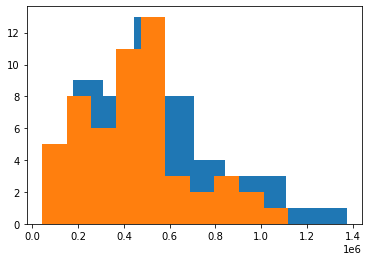

In [15]:
##Histogram of state and mean emissions start of data in 2011 to end of data in 2018
plt.hist(ghg_state_mean_copy['2011'])
plt.hist(ghg_state_mean_copy['2018'])
plt.show()

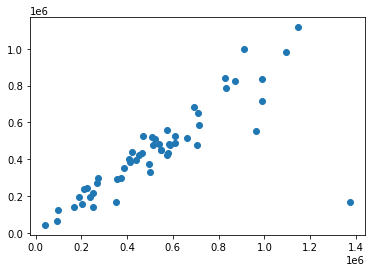

In [16]:
##Plot of emissions in 2011 versus 2018 by state
plt.scatter(ghg_state_mean_copy['2011'], ghg_state_mean_copy['2018'])
## want to change colors to show the difference between 2011 and 2018
##colors = ['red', 'blue']
plt.show()

In [17]:
#Calculate Pearson correlation
print("The Pearson correlation between 2011 and 2018 mean emissions is {} ".format(round(ghg_state_mean_copy["2011"].corr(ghg_state_mean_copy["2018"]),2)))

The Pearson correlation between 2011 and 2018 mean emissions is 0.79 


In [18]:
#Calculate Spearman correlation
print("The spearman correlation between 2011 and 2018 mean emissions is {} ".format(round(ghg_state_mean_copy["2011"].corr(ghg_state_mean_copy["2018"], method= "spearman"),2)))

The spearman correlation between 2011 and 2018 mean emissions is 0.86 


In [19]:
## Sort the data by industry sector
ghg_sector = ghg_data.sort_values(by = ['industry_sector'])
ghg_sector.head()


,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,1006361,110006522735,SANOFI PASTEUR,SWIFTWATER,PA,18370,1 DISCOVERY DRIVE,MONROE,41.09,-75.33,...,C,Chemicals,"36,096.91","35,327.87","34,235.77","33,879.27","31,268.73","32,635.40","38,231.80","40,144.10"
1545,1002301,110014466372,"CF INDUSTRIES NITROGEN, LLC - DONALDSONVILLE N...",DONALDSONVILLE,LA,70346,39018 HIGHWAY 3089,ASCENSION PARISH,30.10,-90.96,...,"C,G,V",Chemicals,"8,685,862.01","8,730,636.16","7,829,243.01","7,985,546.14","6,716,321.03","6,921,307.32","6,854,461.60","6,438,066.71"
4040,1006673,110000845186,"DuPont Nutrition USA, Inc",NEWARK,DE,19711,1301 OGLETOWN ROAD,NEW CASTLE COUNTY,39.68,-75.72,...,C,Chemicals,"28,591.49","31,819.08","3,108.99","31,445.73","29,794.09","32,917.48","30,264.24","32,833.48"
3235,1005292,110063007035,STEPAN CO,ELWOOD,IL,60421,22500 WEST MILLSDALE ROAD,WILL COUNTY,41.44,-88.16,...,C,Chemicals,"26,749.50","30,957.38","27,561.80","31,571.23","38,129.26","39,376.85","34,407.12","34,781.77"
4031,1006664,110018270672,Solvay USA,CHICAGO HEIGHTS,IL,60411,1020 STATE ST,COOK COUNTY,41.51,-87.62,...,C,Chemicals,"31,587.13","31,027.88","31,352.53","27,838.60","32,220.23","30,600.78","27,726.80","27,774.30"


In [20]:
## Subset the state data to only contain the industry sector and years
ghg_sector_mean = ghg_sector[["industry_sector", "2018","2017","2016","2015","2014","2013","2012","2011"]]
ghg_sector_mean.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,"36,096.91","35,327.87","34,235.77","33,879.27","31,268.73","32,635.40","38,231.80","40,144.10"
1545,Chemicals,"8,685,862.01","8,730,636.16","7,829,243.01","7,985,546.14","6,716,321.03","6,921,307.32","6,854,461.60","6,438,066.71"
4040,Chemicals,"28,591.49","31,819.08","3,108.99","31,445.73","29,794.09","32,917.48","30,264.24","32,833.48"
3235,Chemicals,"26,749.50","30,957.38","27,561.80","31,571.23","38,129.26","39,376.85","34,407.12","34,781.77"
4031,Chemicals,"31,587.13","31,027.88","31,352.53","27,838.60","32,220.23","30,600.78","27,726.80","27,774.30"


In [21]:
## Find the range of the dataset
ghg_sector_mean.describe()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
count,5183,5183,5183,5183,5183,5183,5183,5183,5183
unique,59,5168,5168,5172,5175,5176,5172,5173,5171
top,Power Plants,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,1208,15,15,7,6,8,10,9,11


In [22]:
## Remove the commas from the strings of numbers in order to convert strings to floats
ghg_sector_mean_copy = ghg_sector_mean.copy()
for col in ghg_sector_mean_copy:
    for row in range(num_rows):
        ghg_sector_mean_copy[col].loc[row] = ghg_sector_mean_copy[col].loc[row].replace(",","")
ghg_sector_mean_copy.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,36096.91,35327.87,34235.77,33879.27,31268.73,32635.40,38231.80,40144.10
1545,Chemicals,8685862.01,8730636.16,7829243.01,7985546.14,6716321.03,6921307.32,6854461.60,6438066.71
4040,Chemicals,28591.49,31819.08,3108.99,31445.73,29794.09,32917.48,30264.24,32833.48
3235,Chemicals,26749.50,30957.38,27561.80,31571.23,38129.26,39376.85,34407.12,34781.77
4031,Chemicals,31587.13,31027.88,31352.53,27838.60,32220.23,30600.78,27726.80,27774.30


In [23]:
## Change the type of the year columns to floats in order to calcualte the mean (they are originally strings)
ghg_sector_mean_copy = ghg_sector_mean_copy.astype({"2018": 'float64', "2017": 'float64', "2016":'float64', "2015": 'float64', "2014": 'float64', "2013": 'float64', "2012": 'float64', "2011": 'float64'})
ghg_sector_mean_copy.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,36096.91,35327.87,34235.77,33879.27,31268.73,32635.40,38231.80,40144.10
1545,Chemicals,8685862.01,8730636.16,7829243.01,7985546.14,6716321.03,6921307.32,6854461.60,6438066.71
4040,Chemicals,28591.49,31819.08,3108.99,31445.73,29794.09,32917.48,30264.24,32833.48
3235,Chemicals,26749.50,30957.38,27561.80,31571.23,38129.26,39376.85,34407.12,34781.77
4031,Chemicals,31587.13,31027.88,31352.53,27838.60,32220.23,30600.78,27726.80,27774.30


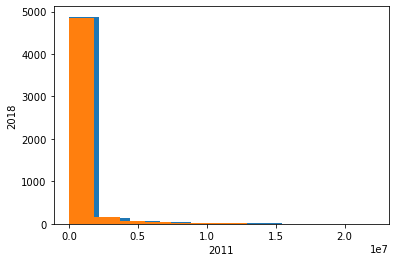

In [24]:
##Histogram of industry and mean emissions start of data to end of data
plt.hist(ghg_sector_mean_copy['2011'])
plt.hist(ghg_sector_mean_copy['2018'])
plt.xlabel('2011')
plt.ylabel('2018')
plt.show()

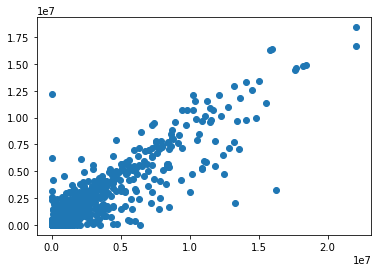

In [25]:
##Scatter plot of emissions in 2011 versus 2018 by state
plt.scatter(ghg_sector_mean_copy['2011'], ghg_sector_mean_copy['2018'])
##colors = ['red', 'blue']
plt.show()

In [26]:
## How do we plot each state's emission trends over the years?
#ghg_data.melt(ghg_data, id_vars=['2011'], value_vars=['2018'])

In [34]:
## Load class survey data
## class_data = pd.read_csv("global_climate_change_class_survey_responses.csv")
## class_data.head()

We found this dataset really interesting to see people's habits on sustainability over time after education on climate change but are not sure exactly how to work with the data. We are thinking of plotting the behaviors over time to see trends in sustainable habits and see how those compare to the trends in pollution over time.

In [35]:
recycling = pd.read_csv("recycling-diversion-and-capture-rates-1.csv")
recycling.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [36]:
recycling["District"].unique()

array(['MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08',
       'MN09', 'MN10', 'MN11', 'MN12', 'BX01', 'BX02', 'BX03', 'BX04',
       'BX05', 'BX06', 'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12',
       'BKN01', 'BKN02', 'BKN03', 'BKN04', 'BKN05', 'BKN08', 'BKN09',
       'BKN16', 'BKN17', 'BKS06', 'BKS07', 'BKS10', 'BKS11', 'BKS12',
       'BKS13', 'BKS14', 'BKS15', 'BKS18', 'QW01', 'QW02', 'QW03', 'QW04',
       'QW05', 'QW06', 'QW09', 'QE07', 'QE08', 'QE10', 'QE11', 'QE12',
       'QE13', 'QE14', 'SI01', 'SI02', 'SI03'], dtype=object)

In [37]:
num_rows= len(recycling)
num_rows

177

In [38]:
## Combine the rows (ex: reaname Brooklyn North and Brooklyn South to Brooklyn)
for i in range(num_rows):
    if (recycling["Zone"][i] == "Brooklyn North" or recycling["Zone"][i] == "Brooklyn South"):
        recycling["Zone"][i] = "Brooklyn"
    elif (recycling["Zone"][i] == "Queens East" or recycling["Zone"][i] == "Queens West"):
        recycling["Zone"][i] = "Queens"

<ipython-input-38-4907d04cfba5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recycling["Zone"][i] = "Brooklyn"
<ipython-input-38-4907d04cfba5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recycling["Zone"][i] = "Queens"


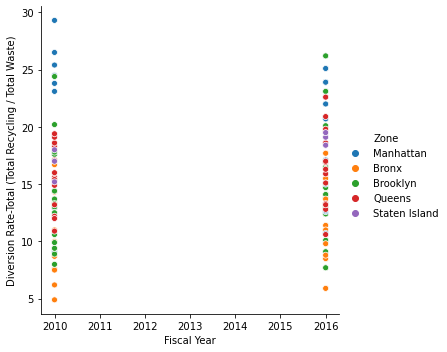

In [39]:
sns.relplot(x="Fiscal Year", y="Diversion Rate-Total (Total Recycling / Total Waste)", hue="Zone", data=recycling)

In [40]:
recycle_2010 = recycling.iloc[0:59]
recycle_2016 = recycling.iloc[59:]

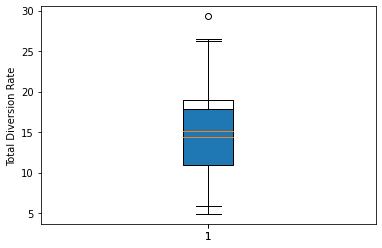

In [41]:
plt.boxplot(recycle_2010["Diversion Rate-Total (Total Recycling / Total Waste)"], patch_artist=True)
plt.boxplot(recycle_2016["Diversion Rate-Total (Total Recycling / Total Waste)"])
plt.ylabel("Total Diversion Rate")
plt.show()

In [42]:
routes = pd.read_csv("bicycle-routes-1.csv")
routes.head()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/2008 12:00:00 AM +0000,09/25/2008 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/1980 12:00:00 AM +0000,07/01/1980 12:00:00 AM +0000,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/2006 12:00:00 AM +0000,07/01/2017 12:00:00 AM +0000,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/2012 12:00:00 AM +0000,09/12/2012 12:00:00 AM +0000,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,NaN,Standard,43043.0,0.000748


In [43]:
type(routes["instdate"][0])

str

In [44]:
routes.tail()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
15963,BROOKFIELD PARK GWY ENTRY DRIVE,BROOKFIELD PARK GWY,5,MULTILINESTRING ((-74.16247525199998 40.562507...,BROOKFIELD PARK GWY,OFF,I,12/12/2017 12:00:00 AM +0000,12/12/2017 12:00:00 AM +0000,NaN,2,2,Greenway,Greenway,293039.0,0.000944
15964,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92744086999994 40.865588...,SEAMAN AVE,ON,III,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,Signed Route,NaN,111627.0,0.000180
15965,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92845994899994 40.865632...,SEAMAN AVE,ON,III,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,Signed Route,NaN,185430.0,0.000173
15966,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92828823699995 40.865653...,SEAMAN AVE,ON,III,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,Signed Route,NaN,185430.0,0.000162
15967,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92812636999997 40.865641...,SEAMAN AVE,ON,III,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,Signed Route,NaN,185429.0,0.000688


In [45]:
##Get rid of the timestamp of each of the dates
for i in range(15968):  
    x = routes["instdate"][i][:11]
    routes["instdate"][i] =  x
    y = routes["moddate"][i][:11]
    routes["moddate"][i] =  y
routes.head()

<ipython-input-45-1d6b84a764e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes["instdate"][i] =  x
<ipython-input-45-1d6b84a764e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes["moddate"][i] =  y


,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/2008,09/25/2008,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/1980,07/01/1980,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/2006,07/01/2017,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/2012,09/12/2012,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/2003,06/01/2003,NaN,L,1,NaN,Standard,43043.0,0.000748


In [46]:
##Change the years so that it is two digits
for i in range(15968):  
    x = routes["instdate"][i][:6] + routes["instdate"][i][8:]
    routes["instdate"][i] =  x
    y = routes["moddate"][i][:6] + routes["moddate"][i][8:]
    routes["moddate"][i] =  y
routes.head()

<ipython-input-46-53246079a377>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes["instdate"][i] =  x
<ipython-input-46-53246079a377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes["moddate"][i] =  y


,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/08,09/25/08,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/80,07/01/80,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/06,07/01/17,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/12,09/12/12,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/03,06/01/03,NaN,L,1,NaN,Standard,43043.0,0.000748


In [47]:
routes.tail()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
15963,BROOKFIELD PARK GWY ENTRY DRIVE,BROOKFIELD PARK GWY,5,MULTILINESTRING ((-74.16247525199998 40.562507...,BROOKFIELD PARK GWY,OFF,I,12/12/17,12/12/17,NaN,2,2,Greenway,Greenway,293039.0,0.000944
15964,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92744086999994 40.865588...,SEAMAN AVE,ON,III,06/01/03,06/01/03,NaN,L,1,Signed Route,NaN,111627.0,0.000180
15965,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92845994899994 40.865632...,SEAMAN AVE,ON,III,06/01/03,06/01/03,NaN,L,1,Signed Route,NaN,185430.0,0.000173
15966,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92828823699995 40.865653...,SEAMAN AVE,ON,III,06/01/03,06/01/03,NaN,L,1,Signed Route,NaN,185430.0,0.000162
15967,BROADWAY,RIVERSIDE DR,1,MULTILINESTRING ((-73.92812636999997 40.865641...,SEAMAN AVE,ON,III,06/01/03,06/01/03,NaN,L,1,Signed Route,NaN,185429.0,0.000688


In [48]:
## Convert from string to date object
from datetime import datetime

for i in range(15968):  
    x = routes["instdate"][i]
    x = x.strip()
    routes.instdate[i] = datetime.strptime(x, '%m/%d/%y')

    y = routes["moddate"][i]
    y = y.strip()
    routes["moddate"][i] =  datetime.strptime(y, '%m/%d/%y')
    
routes.head()

<ipython-input-48-dc3a5fe8691d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes.instdate[i] = datetime.strptime(x, '%m/%d/%y')
<ipython-input-48-dc3a5fe8691d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes["moddate"][i] =  datetime.strptime(y, '%m/%d/%y')


,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,2008-09-25 00:00:00,2008-09-25 00:00:00,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,1980-07-01 00:00:00,1980-07-01 00:00:00,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,2006-06-01 00:00:00,2017-07-01 00:00:00,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,2012-09-12 00:00:00,2012-09-12 00:00:00,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,2003-06-01 00:00:00,2003-06-01 00:00:00,NaN,L,1,NaN,Standard,43043.0,0.000748


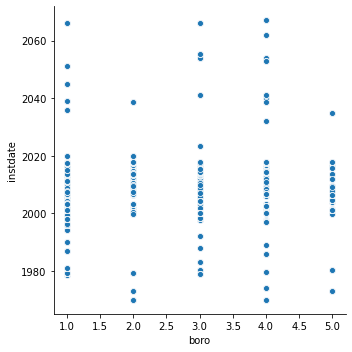

In [49]:
sns.relplot(x="boro", y="instdate", data=routes)

In [50]:
routes.boro.value_counts()

3    4734
1    4253
4    3758
2    2475
5     748
Name: boro, dtype: int64

In [51]:
recycling.Zone.value_counts()

Brooklyn         54
Queens           42
Bronx            36
Manhattan        36
Staten Island     9
Name: Zone, dtype: int64

In [52]:
recycling_subset = recycling.groupby(by='Zone')['Diversion Rate-Total (Total Recycling / Total Waste)', 'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].mean() 
recycling_subset = pd.DataFrame(recycling_subset)
recycling_subset

<ipython-input-52-29db5a73be9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recycling_subset = recycling.groupby(by='Zone')['Diversion Rate-Total (Total Recycling / Total Waste)', 'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].mean()


,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
Zone,,
Bronx,11.558333,35.425000
Brooklyn,14.542593,41.294444
Manhattan,18.705556,43.255556
Queens,16.314286,46.542857
Staten Island,18.244444,54.577778


In [53]:
recycling_subset = recycling_subset.reset_index(level=0)
recycling_subset.head()

,Zone,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Bronx,11.558333,35.425000
1,Brooklyn,14.542593,41.294444
2,Manhattan,18.705556,43.255556
3,Queens,16.314286,46.542857
4,Staten Island,18.244444,54.577778


In [54]:
##Map boro name to the number
zone_map = {"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4 , "Staten Island":5}
w = recycling_subset['Zone'].map(zone_map)
recycling_subset['Zone'] = w
recycling_subset.head()

,Zone,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,2,11.558333,35.425000
1,3,14.542593,41.294444
2,1,18.705556,43.255556
3,4,16.314286,46.542857
4,5,18.244444,54.577778


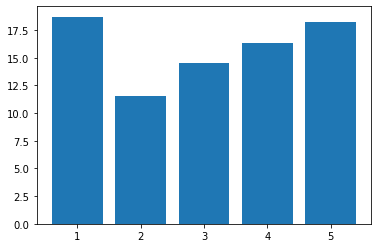

In [55]:
plt.bar(recycling_subset["Zone"], recycling_subset["Diversion Rate-Total (Total Recycling / Total Waste)"])
plt.show()

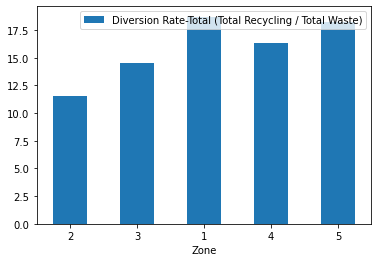

In [56]:
ax = recycling_subset.plot.bar(x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', rot=0)

In [57]:
## Calculate the total number of lanes in each borough and create a new new dataframe using this info
boro_lane_sums = routes.groupby("boro").sum()
boro_lane_sums = boro_lane_sums.reset_index(level=0)
boro_lane_sums = boro_lane_sums[["boro","lanecount"]]
boro_lane_sums = boro_lane_sums.rename(columns={"boro":"Zone"})
boro_lane_sums.head()

,Zone,lanecount
0,1,6056
1,2,4095
2,3,6916
3,4,5874
4,5,1210


In [58]:
## Merge the dataframes and rename the columns
activism_df = pd.merge(boro_lane_sums, recycling_subset, on="Zone")
activism_df = activism_df.rename(columns={"Diversion Rate-Total (Total Recycling / Total Waste)":"Diversion Rate","Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100":"Capture Rate"})
activism_df.head()

,Zone,lanecount,Diversion Rate,Capture Rate
0,1,6056,18.705556,43.255556
1,2,4095,11.558333,35.425000
2,3,6916,14.542593,41.294444
3,4,5874,16.314286,46.542857
4,5,1210,18.244444,54.577778


In [59]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
x = activism_df[["Diversion Rate", "Capture Rate", "Zone"]]
y = activism_df["lanecount"]
activism_model = LinearRegression().fit(x, y)
activism_coef = activism_model.coef_
print("the slope of the linear regression model is: " + str(round(activism_coef[0], 2)))

the slope of the linear regression model is: 2996.99


Text(27.54468750000001, 0.5, 'Lanecounts')

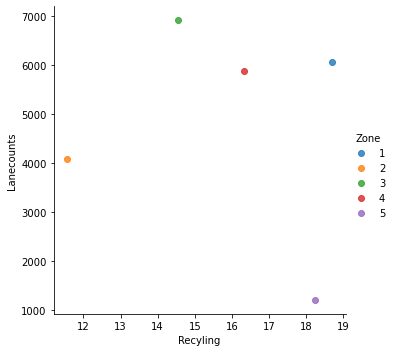

In [61]:
sns.lmplot(x="Diversion Rate", y="lanecount", hue="Zone", data=activism_df);
plt.xlabel("Recyling")
plt.ylabel("Lanecounts")

In [62]:
recycling.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [63]:
ghg_data_ny = ghg_data.query("state == 'NY'")
ghg_data_ny.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
54,1000077,110000774797,"REPUBLIC STEEL, LACKAWANNA",BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,-78.85,...,C,Metals,"78,801.40","76,235.01","61,447.47","73,193.02","77,355.81","71,702.38","80,619.20","72,355.73"
63,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,-73.67,...,"C,TT","Other,Waste","134,663.45","131,363.56","125,491.33","126,818.78","127,808.87","132,095.46","120,944.74","142,529.89"
70,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,-73.85,...,D,Power Plants,"1,381,328.03","1,487,213.14","1,514,867.54","1,285,191.24","1,026,373.20","1,376,177.50","2,133,936.99","1,566,947.61"
76,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,-73.97,...,"C,D",Power Plants,"31,069.94","22,460.32","26,369.45","18,559.93","20,816.32","26,629.45","26,775.50","45,473.83"
79,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,-73.95,...,"C,D",Power Plants,"35,221.82","28,073.30","28,262.00","27,000.90","26,232.55","43,133.84","38,257.51","44,820.68"


In [64]:
print(type(ghg_data_ny["2016"][54]))

<class 'str'>


In [65]:
## Reset Index
ghg_data_ny = ghg_data_ny.reset_index(drop=True)
ghg_data_ny.tail()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
174,1009825,110001566421,"Albert Einstein College of Medicine, Inc.",Bronx,NY,10461,1300 Morris Park Ave,BRONX,40.85,-73.84,...,C,Other,"44,983.25","39,028.20","38,217.95","38,757.24","39,197.70","39,545.21","35,328.91","36,610.83"
175,1009832,110000327398,Olin Chlor Alkali Products,Niagara Falls,NY,14303,2400 Buffalo Avenue,NIAGARA COUNTY,43.08,-79.03,...,C,Chemicals,"25,485.60","27,479.70","30,149.74","31,701.98","33,245.92","32,462.23","29,471.69","26,038.15"
176,1010845,110056382490,Croton Landfill,Croton-on-Hudson,NY,10520,1 Half Moon Bay Drive (Croton Point Park),WESTCHESTER,41.20,-73.89,...,"C,HH",Waste,"31,588.00","32,946.55","33,707.50","35,676.15","37,499.80","40,929.05","48,989.45","43,249.20"
177,1011227,110001984103,Orange County Landfill,New Hampton,NY,10924,21 Training Center Lane,ORANGE,41.40,-74.39,...,"C,HH",Waste,"53,043.45","55,091.75","57,212.35","59,444.35","61,729.65","63,791.10","65,068.05","67,478.30"
178,1011742,110001142228,Special Metals Corporation,Dunkirk,NY,14048,100 Willowbrook Dr,CHAUTAUQUA COUNTY,42.47,-79.34,...,C,Other,"35,986.26","34,515.72","31,802.28","34,286.52","32,025.28","30,897.58","32,691.48","30,299.54"


In [66]:
ghg_rows = len(ghg_data_ny)

In [67]:
## Turn floats into ints
for col in ghg_data_ny:
    for row in range(ghg_rows):
        ghg_data_ny[col].loc[row] = ghg_data_ny[col].loc[row].replace(",","")
ghg_data_ny.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,-78.85,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,-73.67,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,-73.85,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,-73.97,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,-73.95,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


In [68]:
## Change the type of the year columns to floats in order to calcualte the mean (they are originally strings)
ghg_data_ny = ghg_data_ny.astype({"2018": 'float64', "2017": 'float64', "2016":'float64', "2015": 'float64', "2014": 'float64', "2013": 'float64', "2012": 'float64', "2011": 'float64'})
ghg_data_ny.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,-78.85,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,-73.67,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,-73.85,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,-73.97,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,-73.95,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


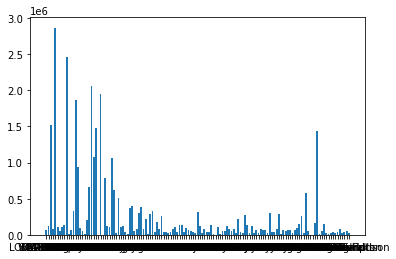

In [69]:
plt.bar(ghg_data_ny["city"], ghg_data_ny["2016"])
plt.show()

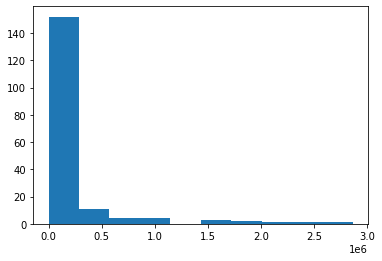

In [70]:
plt.hist(ghg_data_ny["2016"])
plt.show()

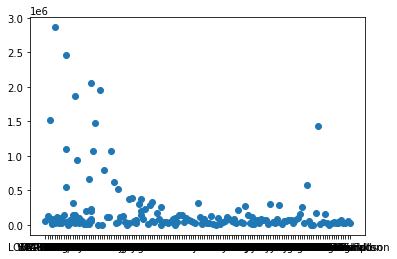

In [71]:
plt.scatter(ghg_data_ny["city"], ghg_data_ny["2016"])
plt.show()

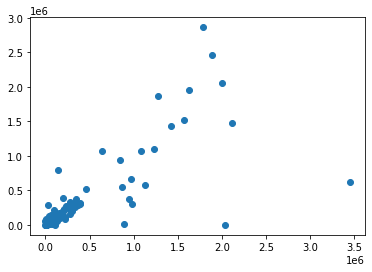

In [72]:
plt.scatter(ghg_data_ny["2011"], ghg_data_ny["2016"])
plt.show()

 Clustered by region, given how much people are recycling, can we predict how many bike rides there are?

Can the increase in recycling and pollution be represented with a linear model? Are they proportional?

Questions:
 - How to reference dataframes from other documents?

In [73]:
recycling = recycling.rename(columns={"Diversion Rate-Total (Total Recycling / Total Waste)":"Diversion Rate","Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100":"Capture Rate"})
recycling.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [74]:
recycling_2016 = recycling[recycling['Fiscal Year'] == 2016]
recycling_2016.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [75]:
recycling_2010 = recycling[recycling['Fiscal Year'] == 2010]
recycling_2010.tail()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
54,Queens,QE13,11,2010,May,14.9,41.9,67.0,50.8
55,Queens,QE14,11,2010,May,10.9,32.0,34.9,33.1
56,Staten Island,SI01,11,2010,May,15.2,47.0,60.8,51.9
57,Staten Island,SI02,11,2010,May,17.0,54.2,65.5,58.2
58,Staten Island,SI03,11,2010,May,18.0,57.7,67.9,61.3


In [76]:
from scipy import stats
from scipy.stats import poisson, ttest_ind

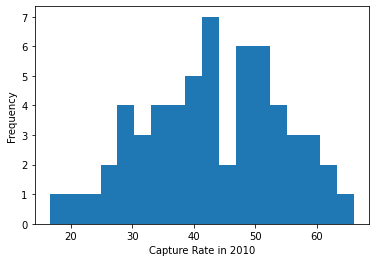

In [77]:
##Histogram for 2010
plt.hist(recycling_2010["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2010")
plt.ylabel("Frequency")
plt.show()

In [78]:
## Average Capture Rate for 2010
mean_2010 = round(recycling_2010[["Capture Rate"]].mean(),2)
draws_2010 = np.random.poisson(mean_2010, 1000)

In [79]:
print("Mean Capture Rate for 2010: ", mean_2010)

Mean Capture Rate for 2010:  Capture Rate    43.22
dtype: float64


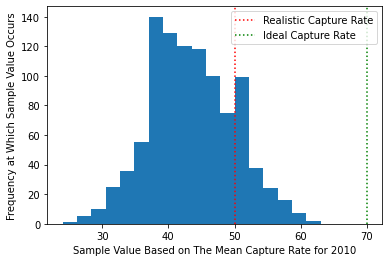

In [80]:
## Histogram for draws_2010
plt.hist(draws_2010, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2010")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [81]:
## Probability of Capturing 50% in 2010
rate50_2010 = round(float(poisson.sf(50, mean_2010)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2010)+"%")

probability of capturing more than 50% of recycled waste: 13.501%


In [82]:
## Probability of Capturing 70% in 2010
rate70_2010 = round(float(poisson.sf(70, mean_2010)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2010)+"%")

probability of capturing more than 70% of recycled waste: 0.0066%


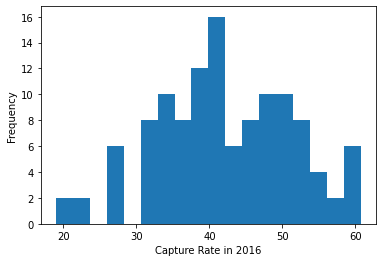

In [83]:
##Histogram for 2016
plt.hist(recycling_2016["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2016")
plt.ylabel("Frequency")
plt.show()

In [84]:
## Average Capture Rate for 2016
mean_2016 = round(recycling_2016[["Capture Rate"]].mean(),2)
draws_2016 = np.random.poisson(mean_2016, 1000)

In [85]:
print("Mean Capture Rate for 2016: ", mean_2016)

Mean Capture Rate for 2016:  Capture Rate    42.02
dtype: float64


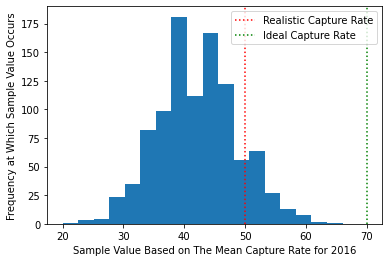

In [86]:
## Histogram for draws_2016
plt.hist(draws_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [87]:
## Probability of Capturing 50% in 2016
rate50_2016 = round(float(poisson.sf(50, mean_2016)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2016)+"%")

probability of capturing more than 50% of recycled waste: 9.8094%


In [88]:
## Probability of Capturing 70% in 2016
rate70_2016 = round(float(poisson.sf(70, mean_2016)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2016)+"%")

probability of capturing more than 70% of recycled waste: 0.0029%


In [89]:
## Find the standard deviation for 2010 and 2016
std_2010 = recycling_2010[["Capture Rate"]].std()
std_2016 = recycling_2016[["Capture Rate"]].std()

In [90]:
##Create the distributions for 2010 and 2016 
x_2010 = pd.DataFrame(np.random.normal(mean_2010,std_2010, size=1000))
y_2016 = pd.DataFrame(np.random.normal(mean_2016,std_2016, size=1000))
recycling_model = LinearRegression().fit(x_2010,y_2016)
print("the slope is: ", round(float(recycling_model.coef_),4))

the slope is:  0.041


In [91]:
stats.ttest_ind(x_2010, y_2016)
print("The p-value is 0.139")
print("The test statistic is 1.477")

The p-value is 0.139
The test statistic is 1.477


In [92]:
## Plots the diversion rate for reycling data set.
## Average Diversion Rate for 2010
mean_diversion_2010 = round(recycling_2010[["Diversion Rate"]].mean(),2)
draws_diversion_2010 = np.random.poisson(mean_diversion_2010, 1000)

In [93]:
print("Mean Diversion Rate for 2010: ", mean_diversion_2010)

Mean Diversion Rate for 2010:  Diversion Rate    15.03
dtype: float64


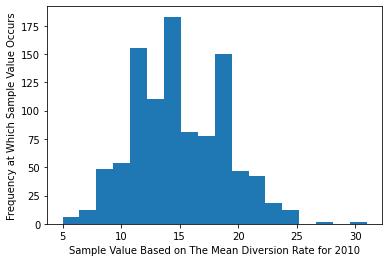

In [94]:
## Histogram for draws_diversion_2010
plt.hist(draws_diversion_2010, bins=18)
plt.xlabel("Sample Value Based on The Mean Diversion Rate for 2010")
plt.ylabel("Frequency at Which Sample Value Occurs")
#plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Diversion Rate")
#plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
#plt.legend(loc="upper right")
plt.show()

In [95]:
## Plots the diversion rate for reycling data set.
## Average Diversion Rate for 2010
mean_diversion_2016 = round(recycling_2016[["Diversion Rate"]].mean(),2)
draws_diversion_2016 = np.random.poisson(mean_diversion_2016, 1000)
print("Mean Diversion Rate for 2016: ", mean_diversion_2016)

Mean Diversion Rate for 2016:  Diversion Rate    15.57
dtype: float64


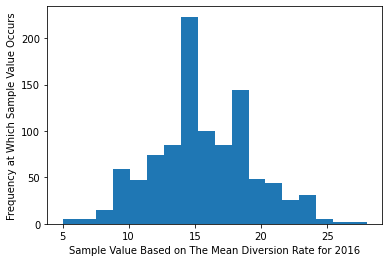

In [96]:
## Histogram for draws_diversion_2016
plt.hist(draws_diversion_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Diversion Rate for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
#plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Diversion Rate")
#plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
#plt.legend(loc="upper right")
plt.show()

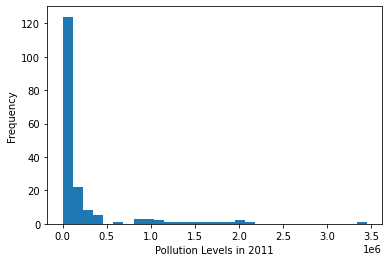

In [97]:
##Histogram for 2011
plt.hist(ghg_data_ny["2011"], bins=30)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Frequency")
plt.show()

In [98]:
## Average Pollution for 2011
ny_2011 = round(ghg_data_ny[["2016"]].mean(),2)
nydraws_2011 = np.random.poisson(ny_2011, 1000)

In [99]:
print("Mean Pollution Levels in NY for 2011: ", ny_2011)

Mean Pollution Levels in NY for 2011:  2016    207073.64
dtype: float64


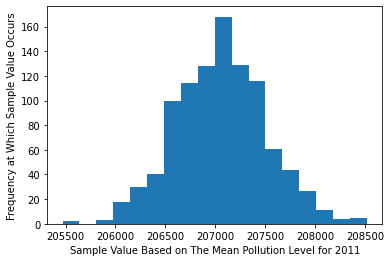

In [100]:
## Histogram for recdraws_2011
plt.hist(nydraws_2011, bins=18)
plt.xlabel("Sample Value Based on The Mean Pollution Level for 2011")
plt.ylabel("Frequency at Which Sample Value Occurs")
# plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
# plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
# plt.legend(loc="upper right")
plt.show()

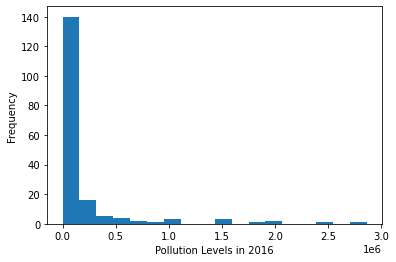

In [101]:
##Histogram for 2016
plt.hist(ghg_data_ny["2016"], bins=18)
plt.xlabel("Pollution Levels in 2016")
plt.ylabel("Frequency")
plt.show()

In [102]:
## Average Pollution for 2016
ny_2016 = round(ghg_data_ny[["2016"]].mean(),2)
nydraws_2016 = np.random.poisson(ny_2016, 1000)

In [103]:
print("Mean Pollution Levels in NY for 2016: ", ny_2016)

Mean Pollution Levels in NY for 2016:  2016    207073.64
dtype: float64


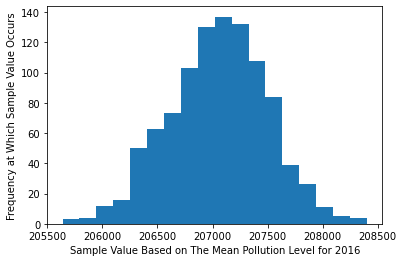

In [104]:
## Histogram for recdraws_2016
plt.hist(nydraws_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Pollution Level for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
# plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
# plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
# plt.legend(loc="upper right")
plt.show()

In [105]:
## Find the standard deviation for 2010 and 2016
nystd_2011 = ghg_data_ny[["2011"]].std()
nystd_2016 = ghg_data_ny[["2016"]].std()

In [106]:
##Create the distributions for 2011 and 2016 
x_ny_2011 = pd.DataFrame(np.random.normal(ny_2011,nystd_2011, size=1000))
y_ny_2016 = pd.DataFrame(np.random.normal(ny_2016,nystd_2016, size=1000))
pollution_model = LinearRegression().fit(x_ny_2011,y_ny_2016)
print("the slope is: ", round(float(recycling_model.coef_),4))

the slope is:  0.041


In [107]:
stats.ttest_ind(x_ny_2011, y_ny_2016)

Ttest_indResult(statistic=array([1.39249012]), pvalue=array([0.16392897]))

In [108]:
print("The p-value is 0.136")
print("The test statistic is 1.489")

The p-value is 0.136
The test statistic is 1.489


In [109]:
recycling_2010.to_csv('recycling_2010.csv')

In [110]:
recycling_2016.to_csv('recycling_2016.csv')

In [111]:
ghg_data_ny.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,-78.85,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,-73.67,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,-73.85,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,-73.97,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,-73.95,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


In [112]:
ghg_data_ny.to_csv('ghg_ny.csv')